<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 20px">

# Project 1: Standardized Test Analysis

### Name: Ahmad Khalil
### Date: 9 July 2021

### Contents:
- [Background](#Background)
- [Problem Statement](#The-Problem-Statement)
- [Data Import](#Data-Import)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Cleaning](#Data-Cleaning)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

## The Problem Statement

#### After browsing through the datasets given, we found out that SAT has lower participation rate than ACT

## Data Import

In [57]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

###### p.s: external resource will be imported when required

In [58]:
# Importing all the files from ACT and SAT from the year 2017-2019

sat17 = pd.read_csv("./data/sat_2017.csv")
sat18 = pd.read_csv("./data/sat_2018.csv")
sat19 = pd.read_csv("./data/sat_2019.csv")
act17 = pd.read_csv("./data/act_2017.csv")
act18 = pd.read_csv("./data/act_2018.csv")
act19 = pd.read_csv("./data/act_2019.csv")

## Exploratory Data Analysis

In [59]:
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [60]:
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [61]:
sat19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


### Findings from previous files


1. sat_2017 and sat_2018 both have 51 lines whereas sat_2019 has 53 lines

2. sat_2017 and sat_2018 both have the same column names whereas sat_2019 has a column name 'EBRW' in place of 'Evidence-Based Reading and Writing'

3. sat_2017 and sat_2018 both have the same column names whereas sat_2019 has a column name 'Participation Rate' in place of 'Participation'

4. All files have the same number of columns

In [62]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [63]:
act18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [64]:
act19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


### Findings from previous files

1. act_2018 and act_2019 both have 3 columns only whereas act_2017 has 6 columns

2. All files have the same number of lines

In [65]:
# Import the file with State Region
# Source: https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv
state_region = pd.read_csv('./data/State_region.csv')

In [66]:
state_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       51 non-null     object
 1   State Code  51 non-null     object
 2   Region      51 non-null     object
 3   Division    51 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


## Data Cleaning

### First work on the SAT files

In [67]:
# Change the column names in sat_2017 and sat_2018 from 'Evidence-Based Reading and Writing' to 'EBRW'
# Change the column names in sat_2017 and sat_2018 from 'Participation' to 'Participation Rate'
sat17.rename(columns={'Participation': 'SAT Participation Rate 2017', 'Evidence-Based Reading and Writing': 'EBRW 2017', 'Math': 'Math 2017', 'Total': 'Total 2017'}, inplace=True)
sat18.rename(columns={'Participation': 'SAT Participation Rate 2018', 'Evidence-Based Reading and Writing': 'EBRW 2018', 'Math': 'Math 2018', 'Total': 'Total 2018'}, inplace=True)
sat19.rename(columns={'Participation Rate': 'SAT Participation Rate 2019', 'EBRW': 'EBRW 2019', 'Math': 'Math 2019', 'Total': 'Total 2019'}, inplace=True)


In [68]:
# Check if the changes are permanent
# Check if all files has the same column names
sat17.head()

,State,SAT Participation Rate 2017,EBRW 2017,Math 2017,Total 2017
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [69]:
sat18.head()

,State,SAT Participation Rate 2018,EBRW 2018,Math 2018,Total 2018
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [70]:
sat19.head()

,State,SAT Participation Rate 2019,EBRW 2019,Math 2019,Total 2019
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [71]:
# Check whether all files has the same number of rows
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State                        51 non-null     object
 1   SAT Participation Rate 2017  51 non-null     object
 2   EBRW 2017                    51 non-null     int64 
 3   Math 2017                    51 non-null     int64 
 4   Total 2017                   51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [72]:
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State                        51 non-null     object
 1   SAT Participation Rate 2018  51 non-null     object
 2   EBRW 2018                    51 non-null     int64 
 3   Math 2018                    51 non-null     int64 
 4   Total 2018                   51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [73]:
sat19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State                        53 non-null     object
 1   SAT Participation Rate 2019  53 non-null     object
 2   EBRW 2019                    53 non-null     int64 
 3   Math 2019                    53 non-null     int64 
 4   Total 2019                   53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [74]:
# Merge the SAT files from year 2017-2019 by common State

sat17_18_19 = pd.merge(left = sat17,
                 right = sat18,
                 on = 'State') 
sat17_18_19 = pd.merge(left = sat17_18_19,
                       right = sat19,
                       on = 'State')

# Double check the results if properly merge
sat17_18_19.head()

,State,SAT Participation Rate 2017,EBRW 2017,Math 2017,Total 2017,SAT Participation Rate 2018,EBRW 2018,Math 2018,Total 2018,SAT Participation Rate 2019,EBRW 2019,Math 2019,Total 2019
0,Alabama,5%,593,572,1165,6%,595,571,1166,7%,583,560,1143
1,Alaska,38%,547,533,1080,43%,562,544,1106,41%,556,541,1097
2,Arizona,30%,563,553,1116,29%,577,572,1149,31%,569,565,1134
3,Arkansas,3%,614,594,1208,5%,592,576,1169,6%,582,559,1141
4,California,53%,531,524,1055,60%,540,536,1076,63%,534,531,1065


In [75]:
sat17_18_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State                        51 non-null     object
 1   SAT Participation Rate 2017  51 non-null     object
 2   EBRW 2017                    51 non-null     int64 
 3   Math 2017                    51 non-null     int64 
 4   Total 2017                   51 non-null     int64 
 5   SAT Participation Rate 2018  51 non-null     object
 6   EBRW 2018                    51 non-null     int64 
 7   Math 2018                    51 non-null     int64 
 8   Total 2018                   51 non-null     int64 
 9   SAT Participation Rate 2019  51 non-null     object
 10  EBRW 2019                    51 non-null     int64 
 11  Math 2019                    51 non-null     int64 
 12  Total 2019                   51 non-null     int64 
dtypes: int64(9), object(4)
memory usage: 

### Secondly work on the ACT files

In [76]:


# Drop columns that cannot be fond in other files
act17.drop(columns=['English', 'Math', 'Reading', 'Science'], inplace=True)

# Rename all columns to be the same
act17.rename(columns={'Participation': 'ACT Participation Rate 2017', 'Composite': 'Composite 2017'}, inplace=True)
act18.rename(columns={'Participation': 'ACT Participation Rate 2018', 'Composite': 'Composite 2018'}, inplace=True)
act19.rename(columns={'Participation': 'ACT Participation Rate 2019', 'Composite': 'Composite 2019'}, inplace=True)


# Remove 'x' from the number '20.2x' in the file act_2017
def clean(x):
    x = x.replace("x", "")
    return float(x)
act17['Composite 2017'] = act17['Composite 2017'].apply(clean)


# Ammend the State 'District of columbia' to a capital 'C'
act18['State'].replace(to_replace = 'District of columbia', value = 'District of Columbia', inplace=True)

In [77]:
# Check the files if removed correctly
act17.tail()

,State,ACT Participation Rate 2017,Composite 2017
47,Virginia,29%,23.8
48,Washington,29%,21.9
49,West Virginia,69%,20.4
50,Wisconsin,100%,20.5
51,Wyoming,100%,20.2


In [78]:
# Check if the ammendment is permanent
act18[5:15]

,State,ACT Participation Rate 2018,Composite 2018
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of Columbia,32%,23.6
9,Florida,66%,19.9
10,Georgia,53%,21.4
11,Hawaii,89%,18.9
12,Idaho,36%,22.3
13,Illinois,43%,23.9
14,Indiana,32%,22.5


In [79]:
act17.head()

,State,ACT Participation Rate 2017,Composite 2017
0,National,60%,21.0
1,Alabama,100%,19.2
2,Alaska,65%,19.8
3,Arizona,62%,19.7
4,Arkansas,100%,19.4


In [80]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        52 non-null     object 
 1   ACT Participation Rate 2017  52 non-null     object 
 2   Composite 2017               52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [81]:
act18.head()

,State,ACT Participation Rate 2018,Composite 2018
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [82]:
act19.head()

,State,ACT Participation Rate 2019,Composite 2019
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [83]:
# Drop the duplicate row for state 'Maine'
act18.drop_duplicates(inplace=True)

# Merge the ACT files from year 2017-2019 by common State
act17_18_19 = pd.merge(left = act17,
                       right = act18,
                       on = 'State') 
act17_18_19 = pd.merge(left = act17_18_19,
                       right = act19,
                       on = 'State') 

In [84]:
# Check if both files have the same number of rows to be merged without removing any row
print(sat17_18_19.info())
print(act17_18_19.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State                        51 non-null     object
 1   SAT Participation Rate 2017  51 non-null     object
 2   EBRW 2017                    51 non-null     int64 
 3   Math 2017                    51 non-null     int64 
 4   Total 2017                   51 non-null     int64 
 5   SAT Participation Rate 2018  51 non-null     object
 6   EBRW 2018                    51 non-null     int64 
 7   Math 2018                    51 non-null     int64 
 8   Total 2018                   51 non-null     int64 
 9   SAT Participation Rate 2019  51 non-null     object
 10  EBRW 2019                    51 non-null     int64 
 11  Math 2019                    51 non-null     int64 
 12  Total 2019                   51 non-null     int64 
dtypes: int64(9), object(4)
memory usage: 

In [85]:
# Assign to a new variable to compile the particpation rate numbers only without the result
sat17a = sat17.drop(columns=['EBRW 2017', 'Math 2017', 'Total 2017'])
sat18a = sat18.drop(columns=['EBRW 2018', 'Math 2018', 'Total 2018'])
sat19a = sat19.drop(columns=['EBRW 2019', 'Math 2019', 'Total 2019'])
act17a = act17.drop(columns=['Composite 2017'])
act18a = act18.drop(columns=['Composite 2018'])
act19a = act19.drop(columns=['Composite 2019'])

In [86]:
# Double check on one of the variables
sat17a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State                        51 non-null     object
 1   SAT Participation Rate 2017  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [87]:
# Combine all sat and act  participation rate from 2017-2019 into one variable
sat_act = pd.merge(left = sat17a,
                  right = act17a,
                  on = 'State')
sat_act = pd.merge(left = sat_act,
                  right = sat18a,
                  on = 'State')
sat_act = pd.merge(left = sat_act,
                  right = act18a,
                  on = 'State')
sat_act = pd.merge(left = sat_act,
                  right = sat19a,
                  on = 'State')
sat_act = pd.merge(left = sat_act,
                  right = act19a,
                  on = 'State')

In [88]:
sat_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State                        51 non-null     object
 1   SAT Participation Rate 2017  51 non-null     object
 2   ACT Participation Rate 2017  51 non-null     object
 3   SAT Participation Rate 2018  51 non-null     object
 4   ACT Participation Rate 2018  51 non-null     object
 5   SAT Participation Rate 2019  51 non-null     object
 6   ACT Participation Rate 2019  51 non-null     object
dtypes: object(7)
memory usage: 3.2+ KB


### Combining the state region file with the sat_act file

In [89]:
# Let's check the file again
state_region

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [90]:
# Combine the file state region to the sat_act file

sat_act = pd.merge(left = state_region,
                  right = sat_act,
                  on = 'State')
sat_act.head()

,State,State Code,Region,Division,SAT Participation Rate 2017,ACT Participation Rate 2017,SAT Participation Rate 2018,ACT Participation Rate 2018,SAT Participation Rate 2019,ACT Participation Rate 2019
0,Alaska,AK,West,Pacific,38%,65%,43%,33%,41%,38%
1,Alabama,AL,South,East South Central,5%,100%,6%,100%,7%,100%
2,Arkansas,AR,South,West South Central,3%,100%,5%,100%,6%,100%
3,Arizona,AZ,West,Mountain,30%,62%,29%,66%,31%,73%
4,California,CA,West,Pacific,53%,31%,60%,27%,63%,23%


In [91]:
# Clean all the numbers and change from an object type to a float type
def change_to_float(x):
    x = x.replace("%", "")
    return float(x) / 100
sat_act['SAT Participation Rate 2017'] = sat_act['SAT Participation Rate 2017'].apply(change_to_float)
sat_act['SAT Participation Rate 2018'] = sat_act['SAT Participation Rate 2018'].apply(change_to_float)
sat_act['SAT Participation Rate 2019'] = sat_act['SAT Participation Rate 2019'].apply(change_to_float)
sat_act['ACT Participation Rate 2017'] = sat_act['ACT Participation Rate 2017'].apply(change_to_float)
sat_act['ACT Participation Rate 2018'] = sat_act['ACT Participation Rate 2018'].apply(change_to_float)
sat_act['ACT Participation Rate 2019'] = sat_act['ACT Participation Rate 2019'].apply(change_to_float)

In [92]:
sat_act.head()

,State,State Code,Region,Division,SAT Participation Rate 2017,ACT Participation Rate 2017,SAT Participation Rate 2018,ACT Participation Rate 2018,SAT Participation Rate 2019,ACT Participation Rate 2019
0,Alaska,AK,West,Pacific,0.38,0.65,0.43,0.33,0.41,0.38
1,Alabama,AL,South,East South Central,0.05,1.00,0.06,1.00,0.07,1.00
2,Arkansas,AR,South,West South Central,0.03,1.00,0.05,1.00,0.06,1.00
3,Arizona,AZ,West,Mountain,0.30,0.62,0.29,0.66,0.31,0.73
4,California,CA,West,Pacific,0.53,0.31,0.60,0.27,0.63,0.23


## Visualize the Data

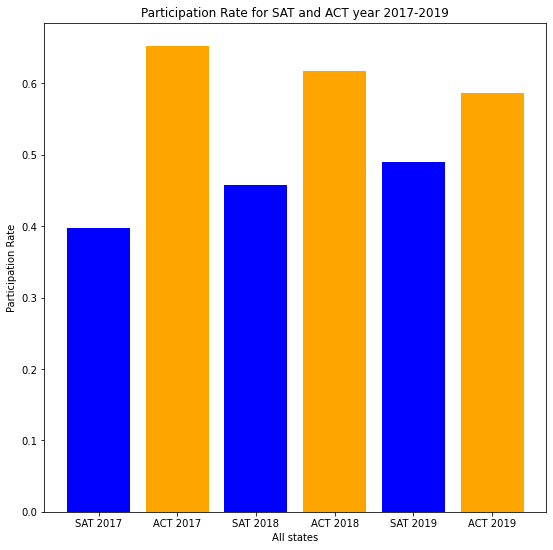

In [93]:
# Plot out a figure for the participation Rate from 2017 - 2019

plt.figure(figsize=(9,9))

plt.bar(['SAT 2017', 'ACT 2017', 
         'SAT 2018','ACT 2018',
         'SAT 2019', 'ACT 2019'], 
        [sat_act['SAT Participation Rate 2017'].mean(), sat_act['ACT Participation Rate 2017'].mean(),
        sat_act['SAT Participation Rate 2018'].mean(), sat_act['ACT Participation Rate 2018'].mean(),
        sat_act['SAT Participation Rate 2019'].mean(), sat_act['ACT Participation Rate 2019'].mean()],
        color = ['blue', 'orange'])

plt.xlabel('All states')
plt.ylabel('Participation Rate')

plt.title('Participation Rate for SAT and ACT year 2017-2019');



In [94]:
# Extract the results from the previous files into a new variable

sat17_total = sat17[['State', 'Total 2017']]
act17_composite = act17[['State', 'Composite 2017']]
sat18_total = sat18[['State', 'Total 2018']]
act18_composite = act18[['State', 'Composite 2018']]
sat19_total = sat19[['State', 'Total 2019']]
act19_composite = act19[['State', 'Composite 2019']]

In [95]:
# Merge 2017 data sets with 100% Participation Rate

# SAT
sat17_100 = sat_act[(sat_act['SAT Participation Rate 2017'] == 1.00)]
sat17_100 = pd.merge (left = sat17_100,
                     right = sat17_total,
                     on = 'State')
sat17_100 = pd.merge (left = sat17_100,
                     right = act17_composite,
                     on = 'State')

sat17_100.drop(columns=['SAT Participation Rate 2018', 'ACT Participation Rate 2018', 
                        'SAT Participation Rate 2019', 'ACT Participation Rate 2019'], 
               inplace=True)

# ACT
act17_100 = sat_act[(sat_act['ACT Participation Rate 2017'] == 1.00)]
act17_100 = pd.merge (left = act17_100,
                     right = sat17_total,
                     on = 'State')

act17_100 = pd.merge (left = act17_100,
                     right = act17_composite,
                     on = 'State')

act17_100.drop(columns=['SAT Participation Rate 2018', 'ACT Participation Rate 2018', 
                        'SAT Participation Rate 2019', 'ACT Participation Rate 2019'], 
               inplace=True)

In [96]:
# Merge 2018 data sets with 100% Participation Rate

# SAT
sat18_100 = sat_act[(sat_act['SAT Participation Rate 2018'] == 1.00)]
sat18_100 = pd.merge (left = sat18_100,
                     right = sat18_total,
                     on = 'State')
sat18_100 = pd.merge (left = sat18_100,
                     right = act18_composite,
                     on = 'State')

sat18_100.drop(columns=['SAT Participation Rate 2017', 'ACT Participation Rate 2017', 
                        'SAT Participation Rate 2019', 'ACT Participation Rate 2019'], 
               inplace=True)

# ACT
act18_100 = sat_act[(sat_act['ACT Participation Rate 2018'] == 1.00)]
act18_100 = pd.merge (left = act18_100,
                     right = sat18_total,
                     on = 'State')

act18_100 = pd.merge (left = act18_100,
                     right = act18_composite,
                     on = 'State')

act18_100.drop(columns=['SAT Participation Rate 2017', 'ACT Participation Rate 2017', 
                        'SAT Participation Rate 2019', 'ACT Participation Rate 2019'], 
               inplace=True)

In [97]:
# Merge 2019 data sets with 100% Participation Rate

# SAT
sat19_100 = sat_act[(sat_act['SAT Participation Rate 2019'] == 1.00)]
sat19_100 = pd.merge (left = sat19_100,
                     right = sat19_total,
                     on = 'State')
sat19_100 = pd.merge (left = sat19_100,
                     right = act19_composite,
                     on = 'State')

sat19_100.drop(columns=['SAT Participation Rate 2017', 'ACT Participation Rate 2017', 
                        'SAT Participation Rate 2018', 'ACT Participation Rate 2018'], 
               inplace=True)

# ACT
act19_100 = sat_act[(sat_act['ACT Participation Rate 2019'] == 1.00)]
act19_100 = pd.merge (left = act19_100,
                     right = sat19_total,
                     on = 'State')

act19_100 = pd.merge (left = act19_100,
                     right = act19_composite,
                     on = 'State')

act19_100.drop(columns=['SAT Participation Rate 2017', 'ACT Participation Rate 2017', 
                        'SAT Participation Rate 2018', 'ACT Participation Rate 2018'], 
               inplace=True)

In [98]:
sat17_100

,State,State Code,Region,Division,SAT Participation Rate 2017,ACT Participation Rate 2017,Total 2017,Composite 2017
0,Connecticut,CT,Northeast,New England,1.0,0.31,1041,25.2
1,District of Columbia,DC,South,South Atlantic,1.0,0.32,950,24.2
2,Delaware,DE,South,South Atlantic,1.0,0.18,996,24.1
3,Michigan,MI,Midwest,East North Central,1.0,0.29,1005,24.1


In [99]:
act17_100

,State,State Code,Region,Division,SAT Participation Rate 2017,ACT Participation Rate 2017,Total 2017,Composite 2017
0,Alabama,AL,South,East South Central,0.05,1.0,1165,19.2
1,Arkansas,AR,South,West South Central,0.03,1.0,1208,19.4
2,Colorado,CO,West,Mountain,0.11,1.0,1201,20.8
3,Kentucky,KY,South,East South Central,0.04,1.0,1247,20.0
4,Louisiana,LA,South,West South Central,0.04,1.0,1198,19.5
5,Minnesota,MN,Midwest,West North Central,0.03,1.0,1295,21.5
6,Missouri,MO,Midwest,West North Central,0.03,1.0,1271,20.4
7,Mississippi,MS,South,East South Central,0.02,1.0,1242,18.6
8,Montana,MT,West,Mountain,0.10,1.0,1196,20.3
9,North Carolina,NC,South,South Atlantic,0.49,1.0,1081,19.1


In [100]:
sat18_100

,State,State Code,Region,Division,SAT Participation Rate 2018,ACT Participation Rate 2018,Total 2018,Composite 2018
0,Colorado,CO,West,Mountain,1.0,0.30,1025,23.9
1,Connecticut,CT,Northeast,New England,1.0,0.26,1053,25.6
2,Delaware,DE,South,South Atlantic,1.0,0.17,998,23.8
3,Idaho,ID,West,Mountain,1.0,0.36,1001,22.3
4,Michigan,MI,Midwest,East North Central,1.0,0.22,1011,24.2


In [101]:
act18_100

,State,State Code,Region,Division,SAT Participation Rate 2018,ACT Participation Rate 2018,Total 2018,Composite 2018
0,Alabama,AL,South,East South Central,0.06,1.0,1166,19.1
1,Arkansas,AR,South,West South Central,0.05,1.0,1169,19.4
2,Kentucky,KY,South,East South Central,0.04,1.0,1248,20.2
3,Louisiana,LA,South,West South Central,0.04,1.0,1210,19.2
4,Missouri,MO,Midwest,West North Central,0.04,1.0,1262,20.0
5,Mississippi,MS,South,East South Central,0.03,1.0,1236,18.6
6,Montana,MT,West,Mountain,0.10,1.0,1198,20.0
7,North Carolina,NC,South,South Atlantic,0.52,1.0,1098,19.1
8,Nebraska,NE,Midwest,West North Central,0.03,1.0,1252,20.1
9,Nevada,NV,West,Mountain,0.23,1.0,1140,17.7


In [102]:
sat19_100

,State,State Code,Region,Division,SAT Participation Rate 2019,ACT Participation Rate 2019,Total 2019,Composite 2019
0,Colorado,CO,West,Mountain,1.0,0.27,1024,23.8
1,Connecticut,CT,Northeast,New England,1.0,0.22,1046,25.5
2,Delaware,DE,South,South Atlantic,1.0,0.13,985,24.1
3,Florida,FL,South,South Atlantic,1.0,0.54,999,20.1
4,Idaho,ID,West,Mountain,1.0,0.31,993,22.5
5,Illinois,IL,Midwest,East North Central,1.0,0.35,1013,24.3
6,Michigan,MI,Midwest,East North Central,1.0,0.19,1003,24.4
7,Rhode Island,RI,Northeast,New England,1.0,0.12,995,24.7


In [103]:
act19_100

,State,State Code,Region,Division,SAT Participation Rate 2019,ACT Participation Rate 2019,Total 2019,Composite 2019
0,Alabama,AL,South,East South Central,0.07,1.0,1143,18.9
1,Arkansas,AR,South,West South Central,0.06,1.0,1141,19.3
2,Kentucky,KY,South,East South Central,0.04,1.0,1232,19.8
3,Louisiana,LA,South,West South Central,0.05,1.0,1200,18.8
4,Mississippi,MS,South,East South Central,0.03,1.0,1237,18.4
5,Montana,MT,West,Mountain,0.09,1.0,1199,19.8
6,North Carolina,NC,South,South Atlantic,0.51,1.0,1100,19.0
7,Nebraska,NE,Midwest,West North Central,0.03,1.0,1260,20.0
8,Nevada,NV,West,Mountain,0.20,1.0,1156,17.9
9,Ohio,OH,Midwest,East North Central,0.19,1.0,1097,20.0


### Plot a correlation figure for the files above and see the results

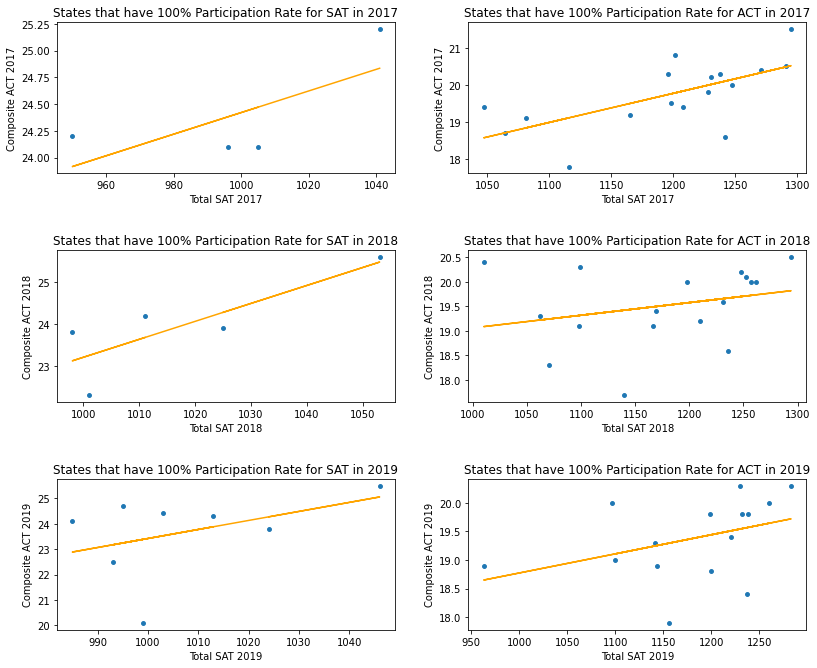

In [104]:
plt.figure(figsize=[12,19])

# Plot no. 1

ax1 = plt.subplot(6, 2, 1)
ax1.scatter(sat17_100["Total 2017"], sat17_100["Composite 2017"], s=15)
ax1.set_title('States that have 100% Participation Rate for SAT in 2017')
ax1.set_xlabel('Total SAT 2017')
ax1.set_ylabel('Composite ACT 2017');

# Linear Regression:

X1 = sat17_100[['Total 2017']]
y1 = sat17_100['Composite 2017']
y1.shape
lr = LinearRegression()
lr.fit(X1, y1)
lr.intercept_
lr.coef_
y1_pred = lr.predict(X1)

ax1.plot(sat17_100['Total 2017'], y1_pred, color='orange');

# Plot no. 2

ax2 = plt.subplot(6, 2, 2)
ax2.scatter(act17_100["Total 2017"], act17_100["Composite 2017"], s=15)
ax2.set_title('States that have 100% Participation Rate for ACT in 2017')
ax2.set_xlabel('Total SAT 2017')
ax2.set_ylabel('Composite ACT 2017');

# Linear Regression:

X2 = act17_100[['Total 2017']]
y2 = act17_100['Composite 2017']
y2.shape
lr = LinearRegression()
lr.fit(X2, y2)
lr.intercept_
lr.coef_
y2_pred = lr.predict(X2)

ax2.plot(act17_100['Total 2017'], y2_pred, color='orange');

# Plot no. 3

ax3 = plt.subplot(6, 2, 3)
ax3.scatter(sat18_100["Total 2018"], sat18_100["Composite 2018"], s=15)
ax3.set_title('States that have 100% Participation Rate for SAT in 2018')
ax3.set_xlabel('Total SAT 2018')
ax3.set_ylabel('Composite ACT 2018');

# Linear Regression:

X3 = sat18_100[['Total 2018']]
y3 = sat18_100['Composite 2018']
y3.shape
lr = LinearRegression()
lr.fit(X3, y3)
lr.intercept_
lr.coef_
y3_pred = lr.predict(X3)

ax3.plot(sat18_100['Total 2018'], y3_pred, color='orange');

#Plot no. 4

ax4 = plt.subplot(6, 2, 4)
ax4.scatter(act18_100["Total 2018"], act18_100["Composite 2018"], s=15)
ax4.set_title('States that have 100% Participation Rate for ACT in 2018')
ax4.set_xlabel('Total SAT 2018')
ax4.set_ylabel('Composite ACT 2018');

# Linear Regression:

X4 = act18_100[['Total 2018']]
y4 = act18_100['Composite 2018']
y4.shape
lr = LinearRegression()
lr.fit(X4, y4)
lr.intercept_
lr.coef_
y4_pred = lr.predict(X4)

ax4.plot(act18_100['Total 2018'], y4_pred, color='orange');

# Plot no. 5

ax5 = plt.subplot(6, 2, 5)
ax5.scatter(sat19_100["Total 2019"], sat19_100["Composite 2019"], s=15)
ax5.set_title('States that have 100% Participation Rate for SAT in 2019')
ax5.set_xlabel('Total SAT 2019')
ax5.set_ylabel('Composite ACT 2019');

# Linear Regression:

X5 = sat19_100[['Total 2019']]
y5 = sat19_100['Composite 2019']
y5.shape
lr = LinearRegression()
lr.fit(X5, y5)
lr.intercept_
lr.coef_
y5_pred = lr.predict(X5)

ax5.plot(sat19_100['Total 2019'], y5_pred, color='orange');

# Plot no. 6

ax6 = plt.subplot(6, 2, 6)
ax6.scatter(act19_100["Total 2019"], act19_100["Composite 2019"], s=15)
ax6.set_title('States that have 100% Participation Rate for ACT in 2019')
ax6.set_xlabel('Total SAT 2019')
ax6.set_ylabel('Composite ACT 2019')

# Linear Regression:

X6 = act19_100[['Total 2019']]
y6 = act19_100['Composite 2019']
y6.shape
lr = LinearRegression()
lr.fit(X6, y6)
lr.intercept_
lr.coef_
y6_pred = lr.predict(X6)

ax6.plot(act19_100['Total 2019'], y6_pred, color='orange');

# Space up the plot

plt.tight_layout(pad=3.0);


# Insights

## Why are the students taking both tests to begin with?

1. There’s an overlap between content and strategies for the ACT and the SAT, prepping for one will help you on the other as well.
2. Most students who take both tests are applying to more selective schools.
3. Taking two tests will increase the number of test dates to choose from

More from the [source](https://blog.prepscholar.com/do-you-need-to-take-both-the-act-and-sat)

# We want to work on increasing the participation rate for SAT

1. Let's first work on seperating the regions
2. Look at which region needs to boost up participation rate
3. Look at which region to maintain participation rate
4. Any other insights will be added

In [105]:
sat_act_midwest = sat_act[sat_act['Region'] == 'Midwest']
sat_act_northeast = sat_act[sat_act['Region'] == 'Northeast']
sat_act_south = sat_act[sat_act['Region'] == 'South']
sat_act_west = sat_act[sat_act['Region'] == 'West']

In [106]:
# Midwest Participation Rates mean

midwest_sat17_pr = sat_act_midwest['SAT Participation Rate 2017'].sort_values().mean()
midwest_act17_pr = sat_act_midwest['ACT Participation Rate 2017'].sort_values().mean()
midwest_sat18_pr = sat_act_midwest['SAT Participation Rate 2018'].sort_values().mean()
midwest_act18_pr = sat_act_midwest['ACT Participation Rate 2018'].sort_values().mean()
midwest_sat19_pr = sat_act_midwest['SAT Participation Rate 2019'].sort_values().mean()
midwest_act19_pr = sat_act_midwest['ACT Participation Rate 2019'].sort_values().mean()

# Northeast Participation Rates mean

northeast_sat17_pr = sat_act_northeast['SAT Participation Rate 2017'].sort_values().mean()
northeast_act17_pr = sat_act_northeast['ACT Participation Rate 2017'].sort_values().mean()
northeast_sat18_pr = sat_act_northeast['SAT Participation Rate 2018'].sort_values().mean()
northeast_act18_pr = sat_act_northeast['ACT Participation Rate 2018'].sort_values().mean()
northeast_sat19_pr = sat_act_northeast['SAT Participation Rate 2019'].sort_values().mean()
northeast_act19_pr = sat_act_northeast['ACT Participation Rate 2019'].sort_values().mean()

# South Participation Rates mean

south_sat17_pr = sat_act_south['SAT Participation Rate 2017'].sort_values().mean()
south_act17_pr = sat_act_south['ACT Participation Rate 2017'].sort_values().mean()
south_sat18_pr = sat_act_south['SAT Participation Rate 2018'].sort_values().mean()
south_act18_pr = sat_act_south['ACT Participation Rate 2018'].sort_values().mean()
south_sat19_pr = sat_act_south['SAT Participation Rate 2019'].sort_values().mean()
south_act19_pr = sat_act_south['ACT Participation Rate 2019'].sort_values().mean()

# West Participation Rates mean

west_sat17_pr = sat_act_west['SAT Participation Rate 2017'].sort_values().mean()
west_act17_pr = sat_act_west['ACT Participation Rate 2017'].sort_values().mean()
west_sat18_pr = sat_act_west['SAT Participation Rate 2018'].sort_values().mean()
west_act18_pr = sat_act_west['ACT Participation Rate 2018'].sort_values().mean()
west_sat19_pr = sat_act_west['SAT Participation Rate 2019'].sort_values().mean()
west_act19_pr = sat_act_west['ACT Participation Rate 2019'].sort_values().mean()

### Compare the Participation Rate of SAT and ACT by region

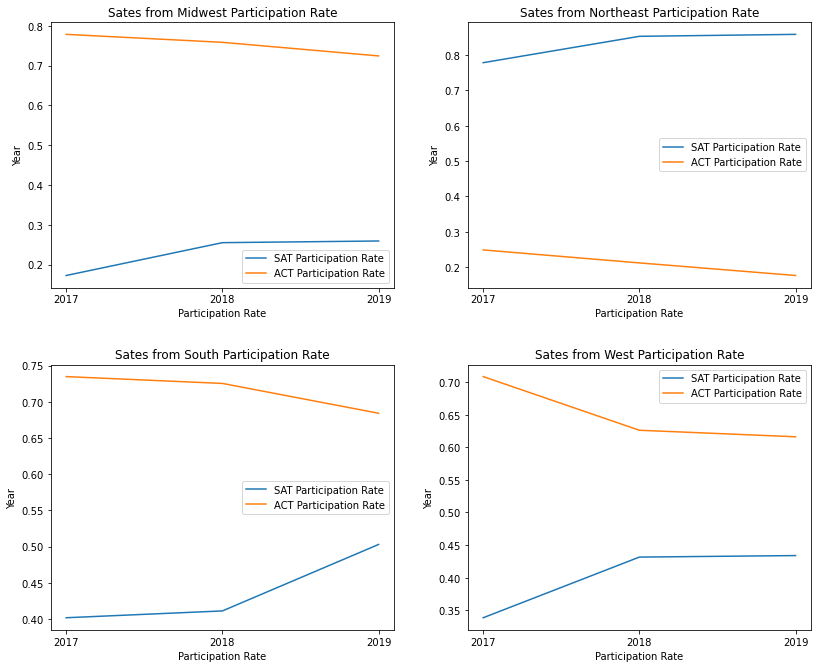

In [107]:
# Plot the figure size

plt.figure(figsize=[12,19])

# Plot no. 1

ax1 = plt.subplot(4, 2, 1)
# line 1 points
a1x1 = ['2017','2018','2019']
a1y1 = [midwest_sat17_pr,midwest_sat18_pr,midwest_sat19_pr]
# plotting the line 1 points 
plt.plot(a1x1, a1y1, label = "SAT Participation Rate")
# line 2 points
a1x2 = a1x1
a1y2 = [midwest_act17_pr,midwest_act18_pr,midwest_act19_pr]
# plotting the line 2 points 
ax1.plot(a1x2, a1y2, label = "ACT Participation Rate")
ax1.set_xlabel('Participation Rate')
# Set the y axis label of the current axis.
ax1.set_ylabel('Year')
# Set a title of the current axes.
ax1.set_title('Sates from Midwest Participation Rate')
# show a legend on the plot
ax1.legend()

# Plot no. 2

ax2 = plt.subplot(4, 2, 2)
# line 1 points
a2x1 = ['2017','2018','2019']
a2y1 = [northeast_sat17_pr,northeast_sat18_pr,northeast_sat19_pr]
# plotting the line 1 points 
plt.plot(a2x1, a2y1, label = "SAT Participation Rate")
# line 2 points
a2x2 = a2x1
a2y2 = [northeast_act17_pr,northeast_act18_pr,northeast_act19_pr]
# plotting the line 2 points 
ax2.plot(a2x2, a2y2, label = "ACT Participation Rate")
ax2.set_xlabel('Participation Rate')
# Set the y axis label of the current axis.
ax2.set_ylabel('Year')
# Set a title of the current axes.
ax2.set_title('Sates from Northeast Participation Rate')
# show a legend on the plot
ax2.legend()

# Plot no. 3

ax3 = plt.subplot(4, 2, 3)
# line 1 points
a3x1 = ['2017','2018','2019']
a3y1 = [south_sat17_pr,south_sat18_pr,south_sat19_pr]
# plotting the line 1 points 
plt.plot(a3x1, a3y1, label = "SAT Participation Rate")
# line 2 points
a3x2 = a3x1
a3y2 = [south_act17_pr,south_act18_pr,south_act19_pr]
# plotting the line 2 points 
ax3.plot(a3x2, a3y2, label = "ACT Participation Rate")
ax3.set_xlabel('Participation Rate')
# Set the y axis label of the current axis.
ax3.set_ylabel('Year')
# Set a title of the current axes.
ax3.set_title('Sates from South Participation Rate')
# show a legend on the plot
ax3.legend()

# Plot no. 4

ax4 = plt.subplot(4, 2, 4)

# line 1 points
a4x1 = ['2017','2018','2019']
a4y1 = [west_sat17_pr,west_sat18_pr,west_sat19_pr]
# plotting the line 1 points 
plt.plot(a4x1, a4y1, label = "SAT Participation Rate")
# line 2 points
a4x2 = a4x1
a4y2 = [west_act17_pr,west_act18_pr,west_act19_pr]
# plotting the line 2 points 
ax4.plot(a4x2, a4y2, label = "ACT Participation Rate")
ax4.set_xlabel('Participation Rate')
# Set the y axis label of the current axis.
ax4.set_ylabel('Year')
# Set a title of the current axes.
ax4.set_title('Sates from West Participation Rate')
# show a legend on the plot
ax4.legend()

# Space up the plot

plt.tight_layout(pad=3.0);


In [108]:
print('The mean SAT Participation Rate in 2017 for Northeast region is', + round(sat_act_northeast['SAT Participation Rate 2017'].mean(), 3))
print('The mean SAT Participation Rate in 2018 for Northeast region is', + round(sat_act_northeast['SAT Participation Rate 2018'].mean(), 3))
print('The mean SAT Participation Rate in 2019 for Northeast region is', + round(sat_act_northeast['SAT Participation Rate 2019'].mean(), 3))
print('The mean ACT Participation Rate in 2017 for Northeast region is', + round(sat_act_northeast['ACT Participation Rate 2017'].mean(), 3))
print('The mean ACT Participation Rate in 2018 for Northeast region is', + round(sat_act_northeast['ACT Participation Rate 2018'].mean(), 3))
print('The mean ACT Participation Rate in 2019 for Northeast region is', + round(sat_act_northeast['ACT Participation Rate 2019'].mean(), 3))

The mean SAT Participation Rate in 2017 for Northeast region is 0.778
The mean SAT Participation Rate in 2018 for Northeast region is 0.852
The mean SAT Participation Rate in 2019 for Northeast region is 0.858
The mean ACT Participation Rate in 2017 for Northeast region is 0.249
The mean ACT Participation Rate in 2018 for Northeast region is 0.212
The mean ACT Participation Rate in 2019 for Northeast region is 0.177


In [109]:
sat_act_northeast.sort_values(by='SAT Participation Rate 2017', ascending=False)

,State,State Code,Region,Division,SAT Participation Rate 2017,ACT Participation Rate 2017,SAT Participation Rate 2018,ACT Participation Rate 2018,SAT Participation Rate 2019,ACT Participation Rate 2019
6,Connecticut,CT,Northeast,New England,1.00,0.31,1.00,0.26,1.00,0.22
30,New Hampshire,NH,Northeast,New England,0.96,0.18,0.96,0.16,0.95,0.14
21,Maine,ME,Northeast,New England,0.95,0.08,0.99,0.07,0.99,0.06
19,Massachusetts,MA,Northeast,New England,0.76,0.29,0.80,0.25,0.81,0.21
39,Rhode Island,RI,Northeast,New England,0.71,0.21,0.97,0.15,1.00,0.12
31,New Jersey,NJ,Northeast,Middle Atlantic,0.70,0.34,0.82,0.31,0.82,0.25
34,New York,NY,Northeast,Middle Atlantic,0.67,0.31,0.79,0.27,0.79,0.22
38,Pennsylvania,PA,Northeast,Middle Atlantic,0.65,0.23,0.70,0.20,0.70,0.17
46,Vermont,VT,Northeast,New England,0.60,0.29,0.64,0.24,0.66,0.20


In [110]:
state_names = sat_act_northeast['State'].to_list()
state_names

['Connecticut',
 'Massachusetts',
 'Maine',
 'New Hampshire',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Rhode Island',
 'Vermont']

In [111]:
northeast_sat_pr17 = sat_act_northeast['SAT Participation Rate 2017'].to_list()
northeast_sat_pr18 = sat_act_northeast['SAT Participation Rate 2018'].to_list()
northeast_sat_pr19 = sat_act_northeast['SAT Participation Rate 2019'].to_list()
northeast_act_pr17 = sat_act_northeast['ACT Participation Rate 2017'].to_list()
northeast_act_pr18 = sat_act_northeast['ACT Participation Rate 2018'].to_list()
northeast_act_pr19 = sat_act_northeast['ACT Participation Rate 2019'].to_list()

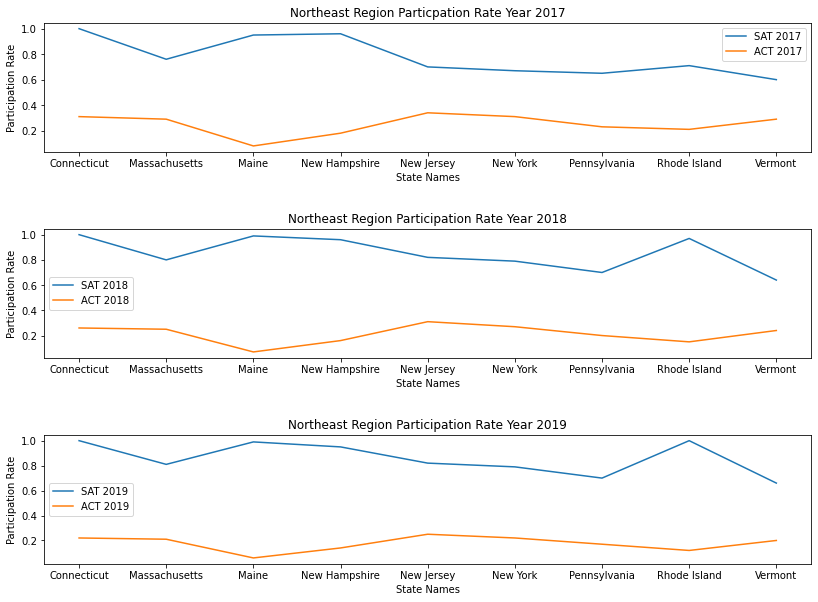

In [112]:
# Plot figure size
plt.figure(figsize=(12,9))

# Plot no.1 for year 2017

a1 = plt.subplot(3,1,1)
ax1 = state_names
ay1 = northeast_sat_pr17
a1.plot(ax1, ay1, label='SAT 2017')
ax2 = ax1
ay2 = northeast_act_pr17
a1.plot(ax2, ay2, label='ACT 2017')
plt.xlabel('State Names')
# Set the y axis label of the current axis.
plt.ylabel('Participation Rate')
# Set a title of the current axes.
plt.title('Northeast Region Particpation Rate Year 2017')
# show a legend on the plot
plt.legend()

# Plot no.2 for year 2018

b1 = plt.subplot(3,1,2)
bx1 = state_names
by1 = northeast_sat_pr18
b1.plot(bx1, by1, label='SAT 2018')
bx2 = ax1
by2 = northeast_act_pr18
b1.plot(bx2, by2, label='ACT 2018')
plt.xlabel('State Names')
# Set the y axis label of the current axis.
plt.ylabel('Participation Rate')
# Set a title of the current axes.
plt.title('Northeast Region Participation Rate Year 2018')
# show a legend on the plot
plt.legend()

# Plot no.3 for year 2019

c1 = plt.subplot(3,1,3)

# line 1 points
cx1 = state_names
cy1 = northeast_sat_pr19
# plotting the line 1 points 
c1.plot(cx1, cy1, label='SAT 2019')

# line 2 points
cx2 = ax1
cy2 = northeast_act_pr19
# plotting the line 1 points 
c1.plot(cx2, cy2, label='ACT 2019')

# Set the x-axis label
plt.xlabel('State Names')
# Set the y-axis label of the current axis.
plt.ylabel('Participation Rate')
# Set a title of the current axes.
plt.title('Northeast Region Participation Rate Year 2019')
# show a legend on the plot
plt.legend()

# Space up the plot

plt.tight_layout(pad=3.0);

### Findings:

- Three states particularly have high partcipation rate: Main, New Hampshire and Rhode Island.
- Why is that so?
- Let's look at the sources:
 * [1. Rhode Island](#https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores)
 * [2. Maine](#https://bangordailynews.com/2015/03/04/opinion/why-maine-should-keep-paying-for-students-to-take-the-sat/)
 * [3. New Hampshire](#https://www.businessnhmagazine.com/article/the-shifting-role-of-the-sat-in-nh)
 
#### What does it say?


- The state makes it a requirement for college admission
- The state pays for the students taking the SAT test

## Conclusions and Recommendations

#### Based on my exploration of the data:

I started with choosing from a particular sets of datasets to work with: SAT 2017-2019 and ACT 2017-2019.

With just a general visualization I found out that there is big difference in the participation rate between both tests. Mainly the low participation rate for SAT in all of the years from 2017 - 2019. I wanted to focus my findings so I continued my research and divide the states into their own regions so I can find out each region's participation rate. After that, I found out that Midwest has the lowest rate whereas Northeast has the highest. 

So I targeted the midwest region to increase the participation rate. In finding ways to increase the rate I think it's crucial to suggest something that is proven and backed by resuts and evidence hence why I look up deeper into Northeast's states to find out the highest participation rate. So, the three states that have high participation rates are: Rhode Island, Main and New Hampshire.

Much research were done and finally I found out the reasons for the high participation rate which are:
- The state makes it a requirement for college admission
- The state pays for the students taking the SAT test

#### So my suggestion and recommendation to increase the participation rate for Midwest region by following best practices from succesful states as follows:

1. Partner with college and state to make it a requirement for admission to college
2. Help to fund students for taking the SAT tests